In [31]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA,TruncatedSVD, NMF
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, AgglomerativeClustering
from kmodes.kmodes import KModes

from scipy.spatial.distance import cdist

In [32]:
customers_data = pd.read_csv('/Users/layzon/Documents/code/modulo_3/project final/data/olist_customers_dataset.csv')
order_items_data = pd.read_csv('/Users/layzon/Documents/code/modulo_3/project final/data/olist_order_items_dataset.csv')
products_data = pd.read_csv('/Users/layzon/Documents/code/modulo_3/project final/data/olist_products_dataset.csv')
translation_data = pd.read_csv('/Users/layzon/Documents/code/modulo_3/project final/data/product_category_name_translation.csv')
orders_data = pd.read_csv('/Users/layzon/Documents/code/modulo_3/project final/data/olist_orders_dataset.csv')
trasaction_data= pd.read_csv('/Users/layzon/Documents/code/modulo_3/project final/data/olist_order_payments_dataset.csv')

In [33]:
products_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


CAMBIO NOMBRE DE CATEGORÍAS A INGLÉS

In [34]:
category_translations = dict(zip(translation_data['product_category_name'],translation_data['product_category_name_english']))
products_data = products_data.replace({'product_category_name':category_translations})


In [35]:
order_items_data

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [36]:
order_items_data["quantity"] = 1
order_items_data["final_price"] = order_items_data.price + order_items_data.freight_value
order_items_data = order_items_data[["order_id","product_id","quantity","final_price"]]
order_items_data

,order_id,product_id,quantity,final_price
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1,72.19
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,1,259.83
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,1,216.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,1,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,1,218.04
...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,1,343.40
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,1,386.53
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,1,116.85
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,1,64.71


In [317]:
order_items_data[order_items_data.order_id == "fedcd9f7ccdc8cba3a18defedd1a5547"]

,order_id,product_id,quantity,final_price
112173,fedcd9f7ccdc8cba3a18defedd1a5547,0554911df28fda9fd668ce5ba5949695,1,102.87
112174,fedcd9f7ccdc8cba3a18defedd1a5547,0554911df28fda9fd668ce5ba5949695,1,102.87


In [29]:
orderqty =order_items_data.groupby(["order_id","product_id","final_price"]) ["quantity"].count().to_frame(name = "quantity").reset_index()
orderqty["total_amount"] = orderqty.final_price * orderqty.quantity
orderqty.sort_values(by=['quantity'] , ascending= False)
#orderqty[orderqty.order_id == "8272b63d03f5f79c56e9e4120aec44ef"]


,order_id,product_id,final_price,quantity,total_amount
10850,1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3,110.12,20,2202.40
68186,ab14fdcfbe524636d65ee38360e22ce8,9571759451b1d780ee7c15012ea109d4,113.14,20,2262.80
26550,428a2f660dc84138d969ccd69a0ab6d5,89b190a046022486c635022524a974a8,81.71,15,1225.65
63242,9ef13efd6949e4573a18964dd1bbe7f5,37eb69aca8718e843d897aa7b82f462d,52.20,15,783.00
46268,73c8ab38f07dc94389065f7eba4f297a,422879e10f46682990de24d770e7f83d,72.43,14,1014.02
...,...,...,...,...,...
35388,5897449bce69856d88610b3c0f4f63b5,b0364648b1c062169015d9234d97d306,199.36,1,199.36
35387,5896d753079d9faa8aeaf60231b3e788,cce679660c66e6fbd5c8091dfd29e9cd,33.00,1,33.00
35386,589673b4d98b5c40931ac6a6ff6f3416,fe01b643060a6446e59f58e3021e66b3,226.95,1,226.95
35385,5895d82d31799f8d7ad6748c25e76dad,24c66f106f642621e524291a895c9032,216.00,1,216.00


In [24]:
orderqty

NameError: name 'orderqty' is not defined

In [319]:
order_items_data.quantity.sum()

112650

JUNTO LA DATA INCLUYENDO SOLO LO QUE NECESITO

In [320]:
category= products_data[['product_id', 'product_category_name']]

In [321]:
#agrupar tipo de pago y monto de la orden
test = trasaction_data[trasaction_data.payment_sequential > 10]
#test.sort_values(by=['order_id', 'payment_sequential'])
trasaction_data[trasaction_data.order_id == "fedcd9f7ccdc8cba3a18defedd1a5547"].sort_values(by=['order_id', 'payment_sequential'])

,order_id,payment_sequential,payment_type,payment_installments,payment_value
9665,fedcd9f7ccdc8cba3a18defedd1a5547,1,credit_card,1,1.67
27087,fedcd9f7ccdc8cba3a18defedd1a5547,2,voucher,1,7.76
87783,fedcd9f7ccdc8cba3a18defedd1a5547,3,voucher,1,26.94
45197,fedcd9f7ccdc8cba3a18defedd1a5547,4,voucher,1,10.33
36869,fedcd9f7ccdc8cba3a18defedd1a5547,5,voucher,1,9.76
103569,fedcd9f7ccdc8cba3a18defedd1a5547,6,voucher,1,8.60
95493,fedcd9f7ccdc8cba3a18defedd1a5547,7,voucher,1,11.78
15930,fedcd9f7ccdc8cba3a18defedd1a5547,8,voucher,1,31.43
14352,fedcd9f7ccdc8cba3a18defedd1a5547,9,voucher,1,5.30
44641,fedcd9f7ccdc8cba3a18defedd1a5547,10,voucher,1,13.27


In [322]:
trasaction_data.payment_installments.value_counts()

1     52546
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
7      1626
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
0         2
23        1
22        1
Name: payment_installments, dtype: int64

In [323]:
#para kmean revisar trasaction_data = trasaction_data.groupby(['order_id',"payment_type"], as_index=False).agg({'payment_value':'sum',"payment_sequential" : "count"})
trasaction_data = trasaction_data.groupby(['order_id'], as_index=False).agg({'payment_value':'sum'})
trasaction_data
#ready trasaction

,order_id,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,343.40
99436,fffcd46ef2263f404302a634eb57f7eb,386.53
99437,fffce4705a9662cd70adb13d4a31832d,116.85
99438,fffe18544ffabc95dfada21779c9644f,64.71


In [324]:
orders_data.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [325]:
orders_data['date'] = pd.to_datetime(orders_data['order_purchase_timestamp']).dt.date
orders_data['time'] = pd.to_datetime(orders_data['order_purchase_timestamp']).dt.time
orders_data = orders_data[["order_id", "customer_id", "order_status","date","time"]]
orders_data = orders_data[orders_data.order_status != "canceled" ] 
orders_data =  orders_data[orders_data.order_status != "unavailable" ] 

orders_data
#ready orders

,order_id,customer_id,order_status,date,time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,21:18:39
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09,09:54:05
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06,12:58:58
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27,14:46:43
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,21:28:27


In [326]:
customers_data.drop("customer_zip_code_prefix", axis = 1)
customers_data
#ready customer

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [327]:
#customer repetidos bajo otra id
customers_data.groupby(["customer_unique_id"])[["customer_id"]].count().sort_values(by=['customer_id'] , ascending= False)

,customer_id
customer_unique_id,
8d50f5eadf50201ccdcedfb9e2ac8455,17
3e43e6105506432c953e165fb2acf44c,9
6469f99c1f9dfae7733b25662e7f1782,7
ca77025e7201e3b30c44b472ff346268,7
1b6c7548a2a1f9037c1fd3ddfed95f33,7
...,...
5657dfebff5868c4dc7e8355fea865c4,1
5657596addb4d7b07b32cd330614bdf8,1
5656eb169546146caeab56c3ffc3d268,1


In [328]:
#clientes que repiten
#order_cust = df.groupby("customer_unique_id")["order"].count().to_frame(name = "order").reset_index()
#order_cust
#order_cust[order_cust.order > 1].sort_values(by=['order'] , ascending= False)
#clientes totales 96 096 , clientes repetidos 11 803.. solo el 12% repite

In [329]:

segment_data = pd.merge(customers_data, orders_data, on='customer_id', how='inner')
segment_data = pd.merge(segment_data, trasaction_data, on='order_id', how='inner')
segment_data = pd.merge(segment_data, order_items_data, on='order_id', how='inner')
data = pd.merge(segment_data, category, on='product_id', how='inner')




In [330]:
#la cantidad de productos es distinta que original
data.quantity.sum()

112098

In [331]:
data[data.order_id == "fedcd9f7ccdc8cba3a18defedd1a5547"]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112098 entries, 0 to 112097
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_id               112098 non-null  object 
 1   customer_unique_id        112098 non-null  object 
 2   customer_zip_code_prefix  112098 non-null  int64  
 3   customer_city             112098 non-null  object 
 4   customer_state            112098 non-null  object 
 5   order_id                  112098 non-null  object 
 6   order_status              112098 non-null  object 
 7   date                      112098 non-null  object 
 8   time                      112098 non-null  object 
 9   payment_value             112098 non-null  float64
 10  product_id                112098 non-null  object 
 11  quantity                  112098 non-null  int64  
 12  final_price               112098 non-null  float64
 13  product_category_name     110509 non-null  o

In [332]:
test =data.groupby(["order_id","customer_unique_id","payment_value", "product_category_name","customer_state"], as_index=False ).agg({'order_status':'count'}).sort_values(by=['order_status'] , ascending= False)


In [333]:
dat=test
#dat.sort_values(by=['order_item_id'] , ascending= False)}

dat.groupby('order_id').agg({'order_status':'count'}).sort_values(by=['order_status'] , ascending= False)

,order_status
order_id,
2f8f31eb2f7b6572836d662a6625c8e4,3
ab1a70d5cd14419a6f2c2aca5ee8a79b,3
a98012aa8c697f2bcff9f8c2183e0f2b,3
306b4ec62d908535f2bfa2877665e899,3
8c2b13adf3f377c8f2b06b04321b0925,3
...,...
55acfaef63e1cd8c8f71ab8e79b84ee0,1
55ac02b6b194b6cebf53799310fb63bb,1
55ab9db2aba357eaf4c98300f85b2189,1


In [335]:

dat

,order_id,customer_unique_id,payment_value,product_category_name,customer_state,order_status
49569,8272b63d03f5f79c56e9e4120aec44ef,4546caea018ad8c692964e3382debd19,196.11,health_beauty,SP,21
64985,ab14fdcfbe524636d65ee38360e22ce8,698e1cf81d01a3d389d96145f7fa6df8,2262.80,auto,GO,20
10319,1b15974a0141d54e36626dca3fdc731a,c402f431464c72e27330a67f7b94d4fb,2202.40,computers_accessories,SP,20
25282,428a2f660dc84138d969ccd69a0ab6d5,0f5ac8d5c31de21d2f25e24be15bbffb,1225.65,furniture_decor,PR,15
60261,9ef13efd6949e4573a18964dd1bbe7f5,11f97da02237a49c8e783dfda6f50e8e,783.00,garden_tools,GO,15
...,...,...,...,...,...,...
34135,59b8a01e16359f7855eb1fc04091ca08,0a61b571f594b6919601bcf3380da7f7,80.89,pet_shop,MG,1
34132,59b598f25ce5991f7526c8ff8fc76601,d733a95f6cb68a232fa3478980d52464,31.79,computers_accessories,SP,1
34131,59b4abe1af7c9b48dcc8330a65a2be81,738ffcf1017b584e9d2684b36e07469c,265.19,watches_gifts,MA,1
34130,59b3620bcd4c286333b2db46533afe81,1dbbe60fd136caa3b2b8e2c9f5bc9db2,36.78,watches_gifts,SP,1


In [202]:
categ={'agro_industry_and_commerce':'outdoor',
       'air_conditioning':'car',
       'art':'home',
       'arts_and_craftmanship':'home',
       'audio':'car',
       'cat_auto':'car',
       'baby':'baby',
       'bed_bath_table':'home',
       'books_general_interest':'books',
       'books_imported':'books',
       'books_technical':'books',
       'cds_dvds_musicals':'electr',
       'christmas_supplies':'home',
       'cine_photo':'other',
       'computers':'computer',
       'computers_accessories':'computer',
       'consoles_games':'game',
       'construction_tools_construction':'outdoor',
       'construction_tools_lights':'outdoor',
       'construction_tools_safety':'outdoor',
       'cool_stuff':'cool',
       'costruction_tools_garden':'outdoor',
       'costruction_tools_tools':'outdoor',
       'diapers_and_hygiene':'health',
       'drinks':'food',
       'dvds_blu_ray':'electr',
       'electronics':'electr',
       'fashio_female_clothing':'apparel',
       'fashion_bags_accessories':'apparel',
       'fashion_childrens_clothes':'apparel',
       'fashion_male_clothing':'apparel',
       'fashion_shoes':'apparel',
       'fashion_sport':'sport',
       'fashion_underwear_beach':'apparel',
       'fixed_telephony':'home',
       'flowers':'home',
       'food':'food',
       'food_drink':'food',
       'furniture_bedroom':'home',
       'furniture_decor':'home',
       'furniture_living_room':'home',
       'furniture_mattress_and_upholstery':'home',
       'garden_tools':'home',
       'health_beauty':'health',
       'home_appliances':'home',
       'home_appliances_2':'home',
       'home_comfort_2':'home',
       'home_confort':'home',
       'home_construction':'home',
       'housewares':'home',
       'industry_commerce_and_business':'office',
       'kitchen_dining_laundry_garden_furniture':'home',
       'la_cuisine':'home',
       'luggage_accessories':'outdoor',
       'market_place':'other',
       'music':'other',
       'musical_instruments':'other',
       'office_furniture':'office',
       'party_supplies':'other',
       'pc_gamer':'computer',
       'perfumery':'health',
       'pet_shop':'other',
       'portateis_cozinha_e_preparadores_de_alimentos':'food',
       'security_and_services':'home',
       'signaling_and_security':'home',
       'small_appliances':'other',
       'small_appliances_home_oven_and_coffee':'home',
       'sports_leisure':'sport',
       'stationery':'office',
       'tablets_printing_image':'other',
       'telephony':'telephony',
       'toys':'baby',
       'watches_gifts':'gift'}

In [27]:
brazil_area={'PA':'norte',
'PB': 'noreste',
'PR':'sur',
'PE':'noreste',
'PI':'noreste',
'RJ':'sureste',
'RN':'noreste',
'RS':'sur',
'RO':'norte',
'RR':'norte',
'SC':'sur',
'SP':'sureste',
'SE':'noreste',
'TO':'norte',
'BA': 'noreste',
'CE': 'noreste',
'DF': 'centro',
'ES':'sureste',
'GO':'centro',
'MA':'noreste',
'MT':'centro',
'MS':'centro',
'MG':'sureste',
'AC':'norte',
'AL':'noreste',
'AP':'norte',
'AM':'norte'}

In [28]:

#data=df[['customer_unique_id','customer_state', 'payment_type']]


In [29]:
data=test.replace({'product_category_name': categ})


In [30]:
data=test.replace({'customer_state': brazil_area})

In [31]:
data['order']=1

In [32]:
data
data[data.order_id == "8272b63d03f5f79c56e9e4120aec44ef"]
#data[data.order_id == "fedcd9f7ccdc8cba3a18defedd1a5547"]

data[data.customer_unique_id == "1b6c7548a2a1f9037c1fd3ddfed95f33"]
data.rename(columns={"order_status": "quantity"})


,order_id,customer_unique_id,payment_value,product_category_name,customer_state,quantity,order
49569,8272b63d03f5f79c56e9e4120aec44ef,4546caea018ad8c692964e3382debd19,196.11,health_beauty,sureste,21,1
64985,ab14fdcfbe524636d65ee38360e22ce8,698e1cf81d01a3d389d96145f7fa6df8,2262.80,auto,centro,20,1
10319,1b15974a0141d54e36626dca3fdc731a,c402f431464c72e27330a67f7b94d4fb,2202.40,computers_accessories,sureste,20,1
25282,428a2f660dc84138d969ccd69a0ab6d5,0f5ac8d5c31de21d2f25e24be15bbffb,1225.65,furniture_decor,sur,15,1
60261,9ef13efd6949e4573a18964dd1bbe7f5,11f97da02237a49c8e783dfda6f50e8e,783.00,garden_tools,centro,15,1
...,...,...,...,...,...,...,...
34135,59b8a01e16359f7855eb1fc04091ca08,0a61b571f594b6919601bcf3380da7f7,80.89,pet_shop,sureste,1,1
34132,59b598f25ce5991f7526c8ff8fc76601,d733a95f6cb68a232fa3478980d52464,31.79,computers_accessories,sureste,1,1
34131,59b4abe1af7c9b48dcc8330a65a2be81,738ffcf1017b584e9d2684b36e07469c,265.19,watches_gifts,noreste,1,1
34130,59b3620bcd4c286333b2db46533afe81,1dbbe60fd136caa3b2b8e2c9f5bc9db2,36.78,watches_gifts,sureste,1,1


In [33]:
#sns.lineplot(x = data.payment_value, y = data.index)

In [66]:
dat=pd.get_dummies(data, columns=['product_category_name', 'customer_state'], prefix = [ '', ''])

In [67]:
len(dat.columns)

83

In [68]:

dat.astype({'order_id': 'object', 'customer_unique_id': 'object', 'payment_value': 'object', 'order_status': 'object', 'order': 'object','_agro_industry_and_commerce': 'float', '_air_conditioning': 'float', '_art': 'float', '_arts_and_craftmanship': 'float', '_audio': 'float', '_auto': 'float', '_baby': 'float', '_bed_bath_table': 'float', '_books_general_interest': 'float', '_books_imported': 'float', '_books_technical': 'float', '_cds_dvds_musicals': 'float', '_christmas_supplies': 'float', '_cine_photo': 'float', '_computers': 'float', '_computers_accessories': 'float', '_consoles_games': 'float', '_construction_tools_construction': 'float', '_construction_tools_lights': 'float', '_construction_tools_safety': 'float', '_cool_stuff': 'float', '_costruction_tools_garden': 'float', '_costruction_tools_tools': 'float', '_diapers_and_hygiene': 'float', '_drinks': 'float', '_dvds_blu_ray': 'float', '_electronics': 'float', '_fashio_female_clothing': 'float', '_fashion_bags_accessories': 'float', '_fashion_childrens_clothes': 'float', '_fashion_male_clothing': 'float', '_fashion_shoes': 'float', '_fashion_sport': 'float', '_fashion_underwear_beach': 'float', '_fixed_telephony': 'float', '_flowers': 'float', '_food': 'float', '_food_drink': 'float', '_furniture_bedroom': 'float', '_furniture_decor': 'float', '_furniture_living_room': 'float', '_furniture_mattress_and_upholstery': 'float', '_garden_tools': 'float', '_health_beauty': 'float', '_home_appliances': 'float', '_home_appliances_2': 'float', '_home_comfort_2': 'float', '_home_confort': 'float', '_home_construction': 'float', '_housewares': 'float', '_industry_commerce_and_business': 'float', '_kitchen_dining_laundry_garden_furniture': 'float', '_la_cuisine': 'float', '_luggage_accessories': 'float', '_market_place': 'float', '_music': 'float', '_musical_instruments': 'float', '_office_furniture': 'float', '_party_supplies': 'float', '_pc_gamer': 'float', '_perfumery': 'float', '_pet_shop': 'float', '_portateis_cozinha_e_preparadores_de_alimentos': 'float', '_security_and_services': 'float', '_signaling_and_security': 'float', '_small_appliances': 'float', '_small_appliances_home_oven_and_coffee': 'float', '_sports_leisure': 'float', '_stationery': 'float', '_tablets_printing_image': 'float', '_telephony': 'float', '_toys': 'float', '_watches_gifts': 'float', '_centro': 'float', '_noreste': 'float', '_norte': 'float', '_sur': 'float', '_sureste': 'float'}).dtypes
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97564 entries, 49569 to 97563
Data columns (total 83 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   order_id                                        97564 non-null  object 
 1   customer_unique_id                              97564 non-null  object 
 2   payment_value                                   97564 non-null  float64
 3   order_status                                    97564 non-null  int64  
 4   order                                           97564 non-null  int64  
 5   _agro_industry_and_commerce                     97564 non-null  uint8  
 6   _air_conditioning                               97564 non-null  uint8  
 7   _art                                            97564 non-null  uint8  
 8   _arts_and_craftmanship                          97564 non-null  uint8  
 9   _audio                             

In [62]:
dat.columns

Index(['_agro_industry_and_commerce', '_air_conditioning', '_art', '_arts_and_craftmanship', '_audio', '_auto', '_baby', '_bed_bath_table', '_books_general_interest', '_books_imported', '_books_technical', '_cds_dvds_musicals', '_christmas_supplies', '_cine_photo', '_computers', '_computers_accessories', '_consoles_games', '_construction_tools_construction', '_construction_tools_lights', '_construction_tools_safety', '_cool_stuff', '_costruction_tools_garden', '_costruction_tools_tools', '_diapers_and_hygiene', '_drinks', '_dvds_blu_ray', '_electronics', '_fashio_female_clothing', '_fashion_bags_accessories', '_fashion_childrens_clothes', '_fashion_male_clothing', '_fashion_shoes', '_fashion_sport', '_fashion_underwear_beach', '_fixed_telephony', '_flowers', '_food', '_food_drink', '_furniture_bedroom', '_furniture_decor', '_furniture_living_room', '_furniture_mattress_and_upholstery', '_garden_tools', '_health_beauty', '_home_appliances', '_home_appliances_2', '_home_comfort_2',
     

In [37]:
col = dat.columns.tolist()
su = ["sum"]
su = su*83

result = dict(zip( col,su))
print(result)

{'order_id': 'sum', 'customer_unique_id': 'sum', 'payment_value': 'sum', 'order_status': 'sum', 'order': 'sum', '_agro_industry_and_commerce': 'sum', '_air_conditioning': 'sum', '_art': 'sum', '_arts_and_craftmanship': 'sum', '_audio': 'sum', '_auto': 'sum', '_baby': 'sum', '_bed_bath_table': 'sum', '_books_general_interest': 'sum', '_books_imported': 'sum', '_books_technical': 'sum', '_cds_dvds_musicals': 'sum', '_christmas_supplies': 'sum', '_cine_photo': 'sum', '_computers': 'sum', '_computers_accessories': 'sum', '_consoles_games': 'sum', '_construction_tools_construction': 'sum', '_construction_tools_lights': 'sum', '_construction_tools_safety': 'sum', '_cool_stuff': 'sum', '_costruction_tools_garden': 'sum', '_costruction_tools_tools': 'sum', '_diapers_and_hygiene': 'sum', '_drinks': 'sum', '_dvds_blu_ray': 'sum', '_electronics': 'sum', '_fashio_female_clothing': 'sum', '_fashion_bags_accessories': 'sum', '_fashion_childrens_clothes': 'sum', '_fashion_male_clothing': 'sum', '_fas

In [63]:
#cambiar el tipo de data
col = dat.columns.tolist()
su = ["float"]
su = su*78

result = dict(zip( col,su))
print(result)

{'_agro_industry_and_commerce': 'float', '_air_conditioning': 'float', '_art': 'float', '_arts_and_craftmanship': 'float', '_audio': 'float', '_auto': 'float', '_baby': 'float', '_bed_bath_table': 'float', '_books_general_interest': 'float', '_books_imported': 'float', '_books_technical': 'float', '_cds_dvds_musicals': 'float', '_christmas_supplies': 'float', '_cine_photo': 'float', '_computers': 'float', '_computers_accessories': 'float', '_consoles_games': 'float', '_construction_tools_construction': 'float', '_construction_tools_lights': 'float', '_construction_tools_safety': 'float', '_cool_stuff': 'float', '_costruction_tools_garden': 'float', '_costruction_tools_tools': 'float', '_diapers_and_hygiene': 'float', '_drinks': 'float', '_dvds_blu_ray': 'float', '_electronics': 'float', '_fashio_female_clothing': 'float', '_fashion_bags_accessories': 'float', '_fashion_childrens_clothes': 'float', '_fashion_male_clothing': 'float', '_fashion_shoes': 'float', '_fashion_sport': 'float', 

In [70]:
dat=dat.groupby(['order_id', 'customer_unique_id', 'payment_value', 'order_status', 'order'], as_index=False ).agg({'_agro_industry_and_commerce': 'sum', '_air_conditioning': 'sum', '_art': 'sum', '_arts_and_craftmanship': 'sum', '_audio': 'sum', '_auto': 'sum', '_baby': 'sum', '_bed_bath_table': 'sum', '_books_general_interest': 'sum', '_books_imported': 'sum', '_books_technical': 'sum', '_cds_dvds_musicals': 'sum', '_christmas_supplies': 'sum', '_cine_photo': 'sum', '_computers': 'sum', '_computers_accessories': 'sum', '_consoles_games': 'sum', '_construction_tools_construction': 'sum', '_construction_tools_lights': 'sum', '_construction_tools_safety': 'sum', '_cool_stuff': 'sum', '_costruction_tools_garden': 'sum', '_costruction_tools_tools': 'sum', '_diapers_and_hygiene': 'sum', '_drinks': 'sum', '_dvds_blu_ray': 'sum', '_electronics': 'sum', '_fashio_female_clothing': 'sum', '_fashion_bags_accessories': 'sum', '_fashion_childrens_clothes': 'sum', '_fashion_male_clothing': 'sum', '_fashion_shoes': 'sum', '_fashion_sport': 'sum', '_fashion_underwear_beach': 'sum', '_fixed_telephony': 'sum', '_flowers': 'sum', '_food': 'sum', '_food_drink': 'sum', '_furniture_bedroom': 'sum', '_furniture_decor': 'sum', '_furniture_living_room': 'sum', '_furniture_mattress_and_upholstery': 'sum', '_garden_tools': 'sum', '_health_beauty': 'sum', '_home_appliances': 'sum', '_home_appliances_2': 'sum', '_home_comfort_2': 'sum', '_home_confort': 'sum', '_home_construction': 'sum', '_housewares': 'sum', '_industry_commerce_and_business': 'sum', '_kitchen_dining_laundry_garden_furniture': 'sum', '_la_cuisine': 'sum', '_luggage_accessories': 'sum', '_market_place': 'sum', '_music': 'sum', '_musical_instruments': 'sum', '_office_furniture': 'sum', '_party_supplies': 'sum', '_pc_gamer': 'sum', '_perfumery': 'sum', '_pet_shop': 'sum', '_portateis_cozinha_e_preparadores_de_alimentos': 'sum', '_security_and_services': 'sum', '_signaling_and_security': 'sum', '_small_appliances': 'sum', '_small_appliances_home_oven_and_coffee': 'sum', '_sports_leisure': 'sum', '_stationery': 'sum', '_tablets_printing_image': 'sum', '_telephony': 'sum', '_toys': 'sum', '_watches_gifts': 'sum', '_centro': 'sum', '_noreste': 'sum', '_norte': 'sum', '_sur': 'sum', '_sureste': 'sum'})
                                         

In [30]:
dat

NameError: name 'dat' is not defined

In [72]:
dat = dat.dropna(how='any',axis=0) 

In [73]:
from sklearn.cluster import KMeans

In [122]:
cols= dat.columns[:].tolist()
cols.remove('order_id')
cols.remove('customer_unique_id')
cols.remove('order_status')
cols.remove('order')
cols

['payment_value',
 '_agro_industry_and_commerce',
 '_air_conditioning',
 '_art',
 '_arts_and_craftmanship',
 '_audio',
 '_auto',
 '_baby',
 '_bed_bath_table',
 '_books_general_interest',
 '_books_imported',
 '_books_technical',
 '_cds_dvds_musicals',
 '_christmas_supplies',
 '_cine_photo',
 '_computers',
 '_computers_accessories',
 '_consoles_games',
 '_construction_tools_construction',
 '_construction_tools_lights',
 '_construction_tools_safety',
 '_cool_stuff',
 '_costruction_tools_garden',
 '_costruction_tools_tools',
 '_diapers_and_hygiene',
 '_drinks',
 '_dvds_blu_ray',
 '_electronics',
 '_fashio_female_clothing',
 '_fashion_bags_accessories',
 '_fashion_childrens_clothes',
 '_fashion_male_clothing',
 '_fashion_shoes',
 '_fashion_sport',
 '_fashion_underwear_beach',
 '_fixed_telephony',
 '_flowers',
 '_food',
 '_food_drink',
 '_furniture_bedroom',
 '_furniture_decor',
 '_furniture_living_room',
 '_furniture_mattress_and_upholstery',
 '_garden_tools',
 '_health_beauty',
 '_home_app

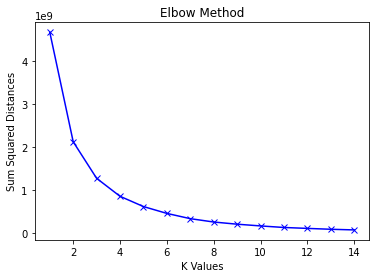

In [123]:
K = range(1,15)
sum_squared_distances = []
for k in K:
  model = KMeans(n_clusters=k).fit(dat[cols])
  sum_squared_distances.append(model.inertia_)
plt.plot(K, sum_squared_distances, "bx-")
plt.xlabel("K Values")
plt.ylabel("Sum Squared Distances")
plt.title("Elbow Method")
plt.show()

In [138]:
kmeans = KMeans(n_clusters=4)
cu_clusters = kmeans.fit(dat[cols])

In [139]:
cu_clusters.cluster_centers_

array([[ 9.09548627e+01,  9.67617937e-04,  1.85570563e-03,
         2.53171268e-03,  2.78355845e-04,  3.30050502e-03,
         3.91288788e-02,  2.95719948e-02,  1.02050555e-01,
         6.15033867e-03,  6.76007052e-04,  3.18120965e-03,
         1.59060483e-04,  1.55083971e-03,  7.55537293e-04,
         1.32550402e-05,  6.96287263e-02,  1.08028578e-02,
         6.79983564e-03,  1.67013507e-03,  1.23271874e-03,
         3.19313919e-02,  1.98825603e-03,  9.54362896e-04,
         3.31376006e-04,  3.61862598e-03,  7.15772172e-04,
         3.06456530e-02,  4.90436488e-04,  2.21889373e-02,
         1.06040322e-04,  1.25922882e-03,  2.58473284e-03,
         3.04865925e-04,  1.52432963e-03,  2.12080644e-03,
         3.71141126e-04,  5.71292234e-03,  2.71728325e-03,
         2.91610885e-04,  6.72825842e-02,  3.65839110e-03,
         4.37416328e-04,  3.64115955e-02,  9.04126294e-02,
         8.93389711e-03,  8.21812494e-04,  3.04865925e-04,
         3.07516933e-03,  4.42718344e-03,  6.32795621e-0

In [140]:
preds = cu_clusters.fit_predict(dat[cols])

In [141]:
dat['cluster']=preds

In [142]:
dat['cluster'].value_counts()

0    75512
3    18078
1     3008
2      390
Name: cluster, dtype: int64

In [154]:
#drop outlier
#dat.drop([1425], inplace = True )

In [158]:
dat[dat.payment_value > 5000]

,order_id,customer_unique_id,payment_value,order_status,order,_agro_industry_and_commerce,_air_conditioning,_art,_arts_and_craftmanship,_audio,_auto,_baby,_bed_bath_table,_books_general_interest,_books_imported,_books_technical,_cds_dvds_musicals,_christmas_supplies,_cine_photo,_computers,_computers_accessories,_consoles_games,_construction_tools_construction,_construction_tools_lights,_construction_tools_safety,_cool_stuff,_costruction_tools_garden,_costruction_tools_tools,_diapers_and_hygiene,_drinks,_dvds_blu_ray,_electronics,_fashio_female_clothing,_fashion_bags_accessories,_fashion_childrens_clothes,_fashion_male_clothing,_fashion_shoes,_fashion_sport,_fashion_underwear_beach,_fixed_telephony,_flowers,_food,_food_drink,_furniture_bedroom,_furniture_decor,_furniture_living_room,_furniture_mattress_and_upholstery,_garden_tools,_health_beauty,_home_appliances,_home_appliances_2,_home_comfort_2,_home_confort,_home_construction,_housewares,_industry_commerce_and_business,_kitchen_dining_laundry_garden_furniture,_la_cuisine,_luggage_accessories,_market_place,_music,_musical_instruments,_office_furniture,_party_supplies,_pc_gamer,_perfumery,_pet_shop,_portateis_cozinha_e_preparadores_de_alimentos,_security_and_services,_signaling_and_security,_small_appliances,_small_appliances_home_oven_and_coffee,_sports_leisure,_stationery,_tablets_printing_image,_telephony,_toys,_watches_gifts,_centro,_noreste,_norte,_sur,_sureste,cluster
3077,0812eb902a67711a1cb742b3cdaa65ae,dc4802a71eae9be1dd28f5d788ceb526,6929.31,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
16816,2cc9089445046817a7539d90805e6e5a,4007669dec559734d6f53e029e360987,6081.54,6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
43706,736e1922ae60d0d6a89247b851902527,763c8b1c9c68a0229c42c9fc6f662b93,7274.88,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
92833,f5136e38d1a14a4dbd87dff67da82701,ff4159b92c40ebe40454e3e6a7c35ed6,6726.66,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
96623,fefacc66af859508bf1a7934eab1e97f,459bef486812aa25204be022145caa62,6922.21,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2


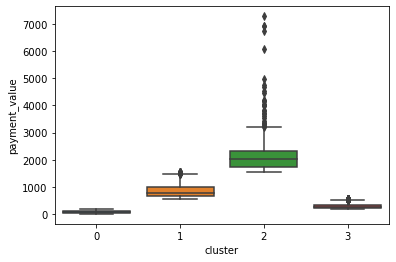

In [156]:
ax = sns.boxplot( x= 'cluster', y ='payment_value' , data=dat)

In [145]:
clust_1= dat[dat['cluster']==0]
clust_2= dat[dat['cluster']==1]
clust_3= dat[dat['cluster']==2]
clust_4= dat[dat['cluster']==3]


In [163]:
print(clust_1.payment_value.mean())
print(clust_1.order_status.mean())

91.04681441359801
1.0812983366882085


In [164]:
print(clust_2.payment_value.mean())
print(clust_2.order_status.mean())

850.1698670212766
1.4328457446808511


In [165]:
print(clust_3.payment_value.mean())
print(clust_3.order_status.mean())

2246.2439999999983
1.6435897435897435


In [166]:
print(clust_4.payment_value.mean())
print(clust_4.order_status.mean())

292.5151067595979
1.289744440756721


In [170]:
order_items_data
clust_1[["order_id","customer_unique_id","payment_value","order_status"]]

,order_id,customer_unique_id,payment_value,order_status
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,72.19,1
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,25.78,1
5,00048cc3ae777c65dbb7d2a0634bc1ea,85c835d128beae5b4ce8602c491bf385,34.59,1
6,00054e8431b9d7675808bcb819fb4a32,635d9ac1680f03288e72ada3a1035803,31.75,1
8,0005a1a1728c9d785b8e2b08b904576c,639d23421f5517f69d0c3d6e6564cf0e,157.60,1
...,...,...,...,...
96980,fffb2ef8874127f75b52b643880fd7e0,6b42acb204802253acec6607ff3a9e0b,39.96,1
96982,fffbee3b5462987e66fb49b1c5411df2,ecc3d4eb9b17d2f0865d21f2abecc51c,139.88,1
96985,fffce4705a9662cd70adb13d4a31832d,cd79b407828f02fdbba457111c38e4c4,116.85,1
96986,fffe18544ffabc95dfada21779c9644f,eb803377c9315b564bdedad672039306,64.71,1


In [309]:
cluster_detail_1 = clust_1[["order_id","customer_unique_id","payment_value","order_status"]]
cluster_detail_1 = pd.merge(cluster_detail_1, order_items_data, on='order_id', how='inner')
print("precio promedio de producto ",cluster_detail_1.final_price.mean())
print("ticket promedio ",clust_1.payment_value.mean())
print("promedio de unidades vendidas ",clust_1.order_status.mean())
print("ventas totales ",clust_1.payment_value.sum())
categ = clust_1.columns.tolist()
categ = categ[5:-1]
catclust_1 = clust_1[categ].idxmax(axis=1)
print(catclust_1.value_counts())

precio promedio de producto  83.721663033014
ticket promedio  91.04681441359801
promedio de unidades vendidas  1.0812983366882085
ventas totales  6875127.050000001
home         22561
health        9212
sport         6143
baby          5308
computer      5234
telephony     3667
gift          3453
car           3326
other         3057
cool          2388
electr        2369
office        2171
apparel       2110
outdoor       1766
food           909
game           811
books          746
sureste        223
sur             30
noreste         15
centro          13
dtype: int64


In [291]:
categ = clust_1.columns.tolist()
categ = categ[5:-1]
catclust_1 = clust_1[categ].idxmax(axis=1)
catclust_1.value_counts()
categ

['outdoor',
 'car',
 'home',
 'home',
 'car',
 'car',
 'baby',
 'home',
 'books',
 'books',
 'books',
 'electr',
 'home',
 'other',
 'computer',
 'computer',
 'game',
 'outdoor',
 'outdoor',
 'outdoor',
 'cool',
 'outdoor',
 'outdoor',
 'health',
 'food',
 'electr',
 'electr',
 'apparel',
 'apparel',
 'apparel',
 'apparel',
 'apparel',
 'sport',
 'apparel',
 'home',
 'home',
 'food',
 'food',
 'home',
 'home',
 'home',
 'home',
 'home',
 'health',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'office',
 'home',
 'home',
 'outdoor',
 'other',
 'other',
 'other',
 'other',
 'other',
 'computer',
 'health',
 'other',
 'food',
 'home',
 'home',
 'other',
 'home',
 'sport',
 'office',
 'other',
 'telephony',
 'baby',
 'gift',
 'centro',
 'noreste',
 'norte',
 'sur',
 'sureste']

In [308]:
cluster_detail_2 = clust_2[["order_id","customer_unique_id","payment_value","order_status"]]
cluster_detail_2 = pd.merge(cluster_detail_2, order_items_data, on='order_id', how='inner')
print("precio promedio de producto ",cluster_detail_2.final_price.mean())
print("ticket promedio ",clust_2.payment_value.mean())
print("promedio de unidades vendidas ",clust_2.order_status.mean())
print("ventas totales ",clust_2.payment_value.sum())
categ = clust_2.columns.tolist()
categ = categ[5:-1]
catclust_2 = clust_2[categ].idxmax(axis=1)
print(catclust_2.value_counts())

precio promedio de producto  574.6342764044932
ticket promedio  850.1698670212766
promedio de unidades vendidas  1.4328457446808511
ventas totales  2557310.96
home         547
gift         478
computer     333
health       312
other        288
car          198
baby         196
cool         192
sport        130
outdoor      109
telephony     84
game          50
office        24
electr        19
sureste       14
apparel       10
food           8
books          5
noreste        5
centro         3
sur            3
dtype: int64


In [307]:
cluster_detail_3 = clust_3[["order_id","customer_unique_id","payment_value","order_status"]]
cluster_detail_3 = pd.merge(cluster_detail_3, order_items_data, on='order_id', how='inner')
print("precio promedio de producto ",cluster_detail_3.final_price.mean())
print("ticket promedio ",clust_3.payment_value.mean())
print("promedio de unidades vendidas ",clust_3.order_status.mean())
print("ventas totales ",clust_3.payment_value.sum())
categ = clust_3.columns.tolist()
categ = categ[5:-1]
catclust_3 = clust_3[categ].idxmax(axis=1)
print(catclust_3.value_counts())

precio promedio de producto  1349.5413251155614
ticket promedio  2246.2439999999983
promedio de unidades vendidas  1.6435897435897435
ventas totales  876035.1599999999
home         84
computer     62
other        56
gift         37
car          37
sport        30
outdoor      22
health       20
baby         15
cool          8
electr        5
game          4
office        3
telephony     3
apparel       2
noreste       1
food          1
dtype: int64


In [305]:
cluster_detail_3

,order_id,customer_unique_id,payment_value,order_status,product_id,quantity,final_price
0,012f2c4ca09b101a73e18957c3294cd6,9df040be9d7656d4c912b62472bfcf05,1901.62,1,a9e9edb1bcac585bfbfa381ce40e5d99,1,1901.62
1,01a0013ddc7cd129e350e8671b56a263,6d3c02f03efc71b44d52999fc95fc86e,1810.50,3,152397b614be35e54106663bd5671f7d,1,603.50
2,01a0013ddc7cd129e350e8671b56a263,6d3c02f03efc71b44d52999fc95fc86e,1810.50,3,152397b614be35e54106663bd5671f7d,1,603.50
3,01a0013ddc7cd129e350e8671b56a263,6d3c02f03efc71b44d52999fc95fc86e,1810.50,3,152397b614be35e54106663bd5671f7d,1,603.50
4,02058d1c3b825765a4ec45968b8a1c97,d61c923fff01b0e448672a2159ed5757,1826.34,1,d05d4a7430d1293367ba2ffbedcdef05,1,1826.34
...,...,...,...,...,...,...,...
644,fbc8e8d5591dc594ede3b88033625bd0,921972f1568c1c75a26b18b4cb4ed5a7,2022.33,1,89ad4d91b311611f135ef67426267ffc,1,2022.33
645,fdca429f65581d898afc2df41740f716,8411ef4ebe0b18e75fd75efde5455e15,1623.94,1,cb460986a447ed00da792526bf6189e4,1,1623.94
646,fe579bd413f722e51bc98182441e135c,8637975a0cb5150b10528f5697511668,1980.71,1,4aa52adb5489aa151e17023d4e153297,1,1980.71
647,fe8019fe8dd1f1af8ba5c0ffdb113a74,445e36c0849ad359c7b6d99786c3357c,2153.35,1,87feb07adc221a4c6cdf051ea1afd0ff,1,2153.35


In [306]:
cluster_detail_4 = clust_4[["order_id","customer_unique_id","payment_value","order_status"]]
cluster_detail_4 = pd.merge(cluster_detail_4, order_items_data, on='order_id', how='inner')
print("precio promedio de producto ",cluster_detail_4.final_price.mean())
print("ticket promedio ",clust_4.payment_value.mean())
print("promedio de unidades vendidas ",clust_4.order_status.mean())
print("ventas totales ",clust_4.payment_value.sum())
categ = clust_4.columns.tolist()
categ = categ[5:-1]
catclust_4 = clust_4[categ].idxmax(axis=1)
print(catclust_4.value_counts())

precio promedio de producto  220.46282473625197
ticket promedio  292.5151067595979
promedio de unidades vendidas  1.289744440756721
ventas totales  5288088.100000001
home         5000
health       2347
gift         1598
sport        1339
other        1280
computer     1168
baby         1089
cool          969
car           879
outdoor       705
telephony     407
office        306
apparel       237
electr        201
game          182
sureste       167
sur            60
books          58
food           52
centro         17
noreste        15
norte           2
dtype: int64


In [190]:
data[data.order_id == "fedcd9f7ccdc8cba3a18defedd1a5547"]

,order_id,customer_unique_id,payment_value,product_category_name,customer_state,order_status,order
97147,fedcd9f7ccdc8cba3a18defedd1a5547,6fbc7cdadbb522125f4b27ae9dee4060,205.74,office_furniture,sureste,2,1


In [209]:
cols
cols_correct =  [e[1:] for e in cols]
cols_correct
cols_correct.remove('ayment_value')
cols_correct


['agro_industry_and_commerce',
 'air_conditioning',
 'art',
 'arts_and_craftmanship',
 'audio',
 'auto',
 'baby',
 'bed_bath_table',
 'books_general_interest',
 'books_imported',
 'books_technical',
 'cds_dvds_musicals',
 'christmas_supplies',
 'cine_photo',
 'computers',
 'computers_accessories',
 'consoles_games',
 'construction_tools_construction',
 'construction_tools_lights',
 'construction_tools_safety',
 'cool_stuff',
 'costruction_tools_garden',
 'costruction_tools_tools',
 'diapers_and_hygiene',
 'drinks',
 'dvds_blu_ray',
 'electronics',
 'fashio_female_clothing',
 'fashion_bags_accessories',
 'fashion_childrens_clothes',
 'fashion_male_clothing',
 'fashion_shoes',
 'fashion_sport',
 'fashion_underwear_beach',
 'fixed_telephony',
 'flowers',
 'food',
 'food_drink',
 'furniture_bedroom',
 'furniture_decor',
 'furniture_living_room',
 'furniture_mattress_and_upholstery',
 'garden_tools',
 'health_beauty',
 'home_appliances',
 'home_appliances_2',
 'home_comfort_2',
 'home_confo

In [208]:
clust_1.columns

Index(['order_id', 'customer_unique_id', 'payment_value', 'order_status', 'order', '_agro_industry_and_commerce', '_air_conditioning', '_art', '_arts_and_craftmanship', '_audio', '_auto', '_baby', '_bed_bath_table', '_books_general_interest', '_books_imported', '_books_technical', '_cds_dvds_musicals', '_christmas_supplies', '_cine_photo', '_computers', '_computers_accessories', '_consoles_games', '_construction_tools_construction', '_construction_tools_lights', '_construction_tools_safety', '_cool_stuff', '_costruction_tools_garden', '_costruction_tools_tools', '_diapers_and_hygiene', '_drinks', '_dvds_blu_ray', '_electronics', '_fashio_female_clothing', '_fashion_bags_accessories', '_fashion_childrens_clothes', '_fashion_male_clothing', '_fashion_shoes', '_fashion_sport', '_fashion_underwear_beach', '_fixed_telephony', '_flowers', '_food', '_food_drink', '_furniture_bedroom', '_furniture_decor', '_furniture_living_room', '_furniture_mattress_and_upholstery', '_garden_tools',
       '

In [218]:
renamee =  ['order_id', 'customer_unique_id', 'payment_value', 'order_status', 'order', 'outdoor', 'car', 'home', 'home', 'car','car', 'baby', 'home', 'books','books', 'books', 'electr','home', 'other', 'computer', 'computer', 'game', 'outdoor', 'outdoor', 'outdoor', 'cool', 'outdoor', 'outdoor', 'health', 'food', 'electr', 'electr', 'apparel', 'apparel', 'apparel', 'apparel', 'apparel', 'sport', 'apparel', 'home', 'home', 'food', 'food', 'home', 'home', 'home', 'home', 'home',
       'health', 'home', 'home', 'home', 'home', 'home', 'home', 'office', 'home', 'home', 'outdoor', 'other', 'other', 'other', 'other', 'other', 'computer', 'health', 'other', 'food', 'home', 'home', 'other', 'home', 'sport', 'office', 'other', 'telephony', 'baby', 'gift', 'centro', 'noreste', 'norte', 'sur', 'sureste', 'cluster']
len(renamee)

84

In [230]:
results = dict(zip( clust_1.columns.tolist(),renamee))

clust_1.rename(columns = results, inplace = True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,order_id,customer_unique_id,payment_value,order_status,order,outdoor,car,home,home,car,car,baby,home,books,books,books,electr,home,other,computer,computer,game,outdoor,outdoor,outdoor,cool,outdoor,outdoor,health,food,electr,electr,apparel,apparel,apparel,apparel,apparel,sport,apparel,home,home,food,food,home,home,home,home,home,health,home,home,home,home,home,home,office,home,home,outdoor,other,other,other,other,other,computer,health,other,food,home,home,other,home,sport,office,other,telephony,baby,gift,centro,noreste,norte,sur,sureste,cluster
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,72.19,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,25.78,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,00048cc3ae777c65dbb7d2a0634bc1ea,85c835d128beae5b4ce8602c491bf385,34.59,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,00054e8431b9d7675808bcb819fb4a32,635d9ac1680f03288e72ada3a1035803,31.75,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
8,0005a1a1728c9d785b8e2b08b904576c,639d23421f5517f69d0c3d6e6564cf0e,157.60,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96980,fffb2ef8874127f75b52b643880fd7e0,6b42acb204802253acec6607ff3a9e0b,39.96,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
96982,fffbee3b5462987e66fb49b1c5411df2,ecc3d4eb9b17d2f0865d21f2abecc51c,139.88,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
96985,fffce4705a9662cd70adb13d4a31832d,cd79b407828f02fdbba457111c38e4c4,116.85,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
96986,fffe18544ffabc95dfada21779c9644f,eb803377c9315b564bdedad672039306,64.71,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [232]:
clust_2.rename(columns = results, inplace = True)
clust_3.rename(columns = results, inplace = True)
clust_4.rename(columns = results, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [233]:
clust_1.to_csv('cluster_1.csv', index=False)
clust_2.to_csv('cluster_2.csv', index=False)
clust_3.to_csv('cluster_3.csv', index=False)
clust_4.to_csv('cluster_4.csv', index=False)

In [234]:
clust_4

,order_id,customer_unique_id,payment_value,order_status,order,outdoor,car,home,home,car,car,baby,home,books,books,books,electr,home,other,computer,computer,game,outdoor,outdoor,outdoor,cool,outdoor,outdoor,health,food,electr,electr,apparel,apparel,apparel,apparel,apparel,sport,apparel,home,home,food,food,home,home,home,home,home,health,home,home,home,home,home,home,office,home,home,outdoor,other,other,other,other,other,computer,health,other,food,home,home,other,home,sport,office,other,telephony,baby,gift,centro,noreste,norte,sur,sureste,cluster
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,259.83,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,216.87,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,218.04,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3
24,00119ff934e539cf26f92b9ef0cdfed8,13df7b623839b4edc579ee40279d57c8,236.88,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3
25,0011d82c4b53e22e84023405fb467e57,02daaa0e021d624d1784c4ea5cc84ace,315.33,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96976,fff8287bbae429a99bb7e8c21d151c41,028c09f007292c4e3a3b10d296e47987,456.28,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3
96978,fffa82886406ccf10c7b4e35c4ff2788,2a3ab9bf9639491997586882c502540a,273.92,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,3
96981,fffb9224b6fc7c43ebb0904318b10b5f,f736308cd9952b33b90b9fe94da9c8f5,356.76,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,3
96983,fffc94f6ce00a00581880bf54a75a037,0c9aeda10a71f369396d0c04dce13a64,343.40,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3


In [247]:
total_clust.cluster.value_counts()

0    75512
3    18078
1     3008
2      389
Name: cluster, dtype: int64

In [259]:
total_clust = dat[["customer_unique_id", "cluster"]]

total_clust["cluster"].replace(3, 4, inplace = True)
total_clust["cluster"].replace(2, 3, inplace = True)
total_clust["cluster"].replace(1, 2, inplace = True)
total_clust["cluster"].replace(0, 1, inplace = True)

In [262]:
total_clust.to_csv('clientes_cluster.csv', index=False)

In [299]:
total_clust.cluster.value_counts()

1    75512
4    18078
2     3008
3      389
Name: cluster, dtype: int64

In [303]:
clust_3.order_status.describe()

count    390.000000
mean       1.643590
std        1.994503
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       20.000000
Name: order_status, dtype: float64

In [304]:
cluster_detail_3.order_status.describe()

count    649.000000
mean       4.052388
std        4.931666
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       20.000000
Name: order_status, dtype: float64

In [16]:
aorder_items_data = pd.read_csv('/Users/layzon/Documents/code/modulo_3/project final/data/olist_order_items_dataset.csv')
aproducts_data = pd.read_csv('/Users/layzon/Documents/code/modulo_3/project final/data/olist_products_dataset.csv')
atranslation_data = pd.read_csv('/Users/layzon/Documents/code/modulo_3/project final/data/product_category_name_translation.csv')

acategory_translations = dict(zip(atranslation_data['product_category_name'],atranslation_data['product_category_name_english']))
aproducts_data = aproducts_data.replace({'product_category_name':acategory_translations})

#build product category for apriori
product_order_cat = pd.merge(aorder_items_data, aproducts_data, on='product_id', how='inner')
product_order_cat = product_order_cat[['product_id', 'price', 'product_category_name']]
product_order_cat

,product_id,price,product_category_name
0,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff
1,4244733e06e7ecb4970a6e2683c13e61,55.9,cool_stuff
2,4244733e06e7ecb4970a6e2683c13e61,64.9,cool_stuff
3,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff
4,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff
...,...,...,...
112645,4cc4d02efc8f249c13355147fb44e34d,129.9,garden_tools
112646,b10ecf8e33aaaea419a9fa860ea80fb5,99.0,furniture_decor
112647,dd469c03ad67e201bc2179ef077dcd48,736.0,watches_gifts
112648,bbe7651fef80287a816ead73f065fc4b,229.9,sports_leisure


In [18]:
test = product_order_cat[product_order_cat.product_category_name == "bed_bath_table"]
test.drop_duplicates(subset ="product_id",
                     keep = False, inplace = True)



<ipython-input-18-10fd0ed50876>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop_duplicates(subset ="product_id",


,product_id,price,product_category_name
5305,1d417ca09479182e9fdf13a1c77c309f,99.90,bed_bath_table
8470,4b2653088591de362e6ba85b4a474c75,1050.61,bed_bath_table
10628,2c3210fa1dfe1fdf8b8e3254287c9e4c,126.99,bed_bath_table
10629,96f608a5fe010cb34dc25baee3274444,49.89,bed_bath_table
10665,447934cd014b033280977350b730d892,229.99,bed_bath_table
...,...,...,...
112612,56324522787b0f1b85cc081fffadc3f8,169.99,bed_bath_table
112627,bf348f19164cdedd0ae1cf7b1d72fede,82.80,bed_bath_table
112631,9ae3dacfd2327107a1e28274fac25a4e,109.90,bed_bath_table
112640,dd44ecaddb22d00c140856b180f5d9b4,119.90,bed_bath_table


In [20]:
test.price.describe()

count    1594.000000
mean      120.250433
std       139.288632
min         7.500000
25%        53.922500
50%        89.325000
75%       143.967500
max      1999.980000
Name: price, dtype: float64

In [38]:
catg_price = product_order_cat.groupby(['product_category_name'], as_index=False).agg({'price':['min', 'max',"mean"]})
catg_price

product_category_name   price                      
                                                      min      max         mean
0                      agro_industry_and_commerce   12.99  2990.00   342.124858
1                                air_conditioning   10.90  1599.00   185.269226
2                                             art    3.50  6499.00   115.802105
3                           arts_and_craftmanship    9.80   289.49    75.583750
4                                           audio   14.90   598.99   139.254121
5                                            auto    3.49  2258.00   139.957523
6                                            baby    3.54  3899.00   134.344173
7                                  bed_bath_table    6.99  1999.98    93.296327
8                          books_general_interest    6.00   899.90    84.732152
9                                  books_imported   18.99   749.00    77.330833
10                                books_technical    9.95   384.93    71.520824
11                              cds_dvds_musicals   45.00    65.00    52.142857
12                             christmas_supplies    5.50   295.00    57.521699
13                                     cine_photo    6.80   873.99    96.298056
14                                      computers   34.50  6729.00  1098.340542
15                          computers_accessories    3.90  3699.99   116.513903
16                                 consoles_games    5.18  4099.99   138.491838
17                construction_tools_construction    0.85  2300.00   155.734758
18                      construction_tools_lights   12.51  1290.00   135.131579
19                      construction_tools_safety    8.90  3099.90   208.992371
20                                     cool_stuff    7.00  3109.99   167.357969
21                       costruction_tools_garden    8.82  1349.90   108.049958
22                        costruction_tools_tools    6.80  1899.00   154.407282
23                            diapers_and_hygiene   25.00   139.89    40.194615
24                                         drinks    6.00   623.00    59.178628
25                                   dvds_blu_ray    8.90  1420.00    93.740469
26                                    electronics    3.99  2470.50    57.913531
27                         fashio_female_clothing   19.90   198.90    58.409167
28                       fashion_bags_accessories    6.00  1699.99    75.245465
29                      fashion_childrens_clothes   39.99   110.00    71.231250
30                          fashion_male_clothing   14.90   292.50    81.801667
31                                  fashion_shoes   25.90   365.00    89.934237
32                                  fashion_sport   24.99   225.00    70.650333
33                        fashion_underwear_beach    3.90   192.00    72.836260
34                                fixed_telephony    6.00  1790.00   225.693182
35                                        flowers   15.60    65.90    33.637576
36                                           food    9.99   274.99    57.634137
37                                     food_drink    6.50   699.90    54.602446
38                              furniture_bedroom    6.90   650.00   183.750275
39                                furniture_decor    4.90  1899.00    87.564494
40                          furniture_living_room   13.90   839.99   137.011054
41              furniture_mattress_and_upholstery   44.70   399.99   114.949474
42                                   garden_tools    6.35  3930.00   111.630196
43                                  health_beauty    1.20  3124.00   130.163531
44                                home_appliances    6.19  2090.00   103.983826
45                              home_appliances_2   13.90  2350.00   476.124958
46                                 home_comfort_2   12.90   219.99    25.342333
47                                   home_confort    6.99   799.00   134.958618
48                          

In [ ]:
catg_price.to_csv("category_prices.csv",  index=False)